**<h1 align="center">Uber Data Analysis</h1>**

content - Geography -  USA, Sri lanka and pakistan
Time period - Jan -Dec 2016. like total drives, total miles, start_date,end_date, start location, end location and purpose of drive

In [ ]:
# Analysis and mathematical libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

#date and time 
import time, datetime

#warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path="/content/drive/MyDrive/Data Sets/My Uber Drives - 2016.csv"
data=pd.read_csv(path)
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
data.columns=data.columns.str.replace('*','')

In [ ]:
data.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
data.shape

(1156, 7)

In [ ]:
data.describe()   #it will display only miles column because that is the only numerical column

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [ ]:
## Handling missing values
data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

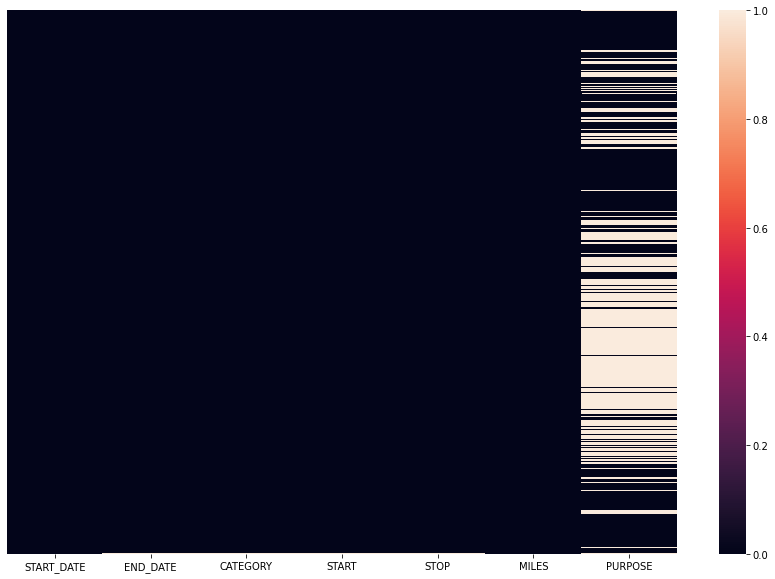

In [ ]:
plt.figure(figsize=(15,10))     #it is used to control the size of the figure  figsize=(length,height)
sb.heatmap(data.isnull(),yticklabels=False)

In [ ]:
data1=data.copy()     #For the sort of experiments we have copied that data to data1 
data1.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [ ]:
data1.dropna(axis=0,how='all' ,subset=['END_DATE','CATEGORY','START','STOP'],inplace=True)

In [ ]:
data1.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

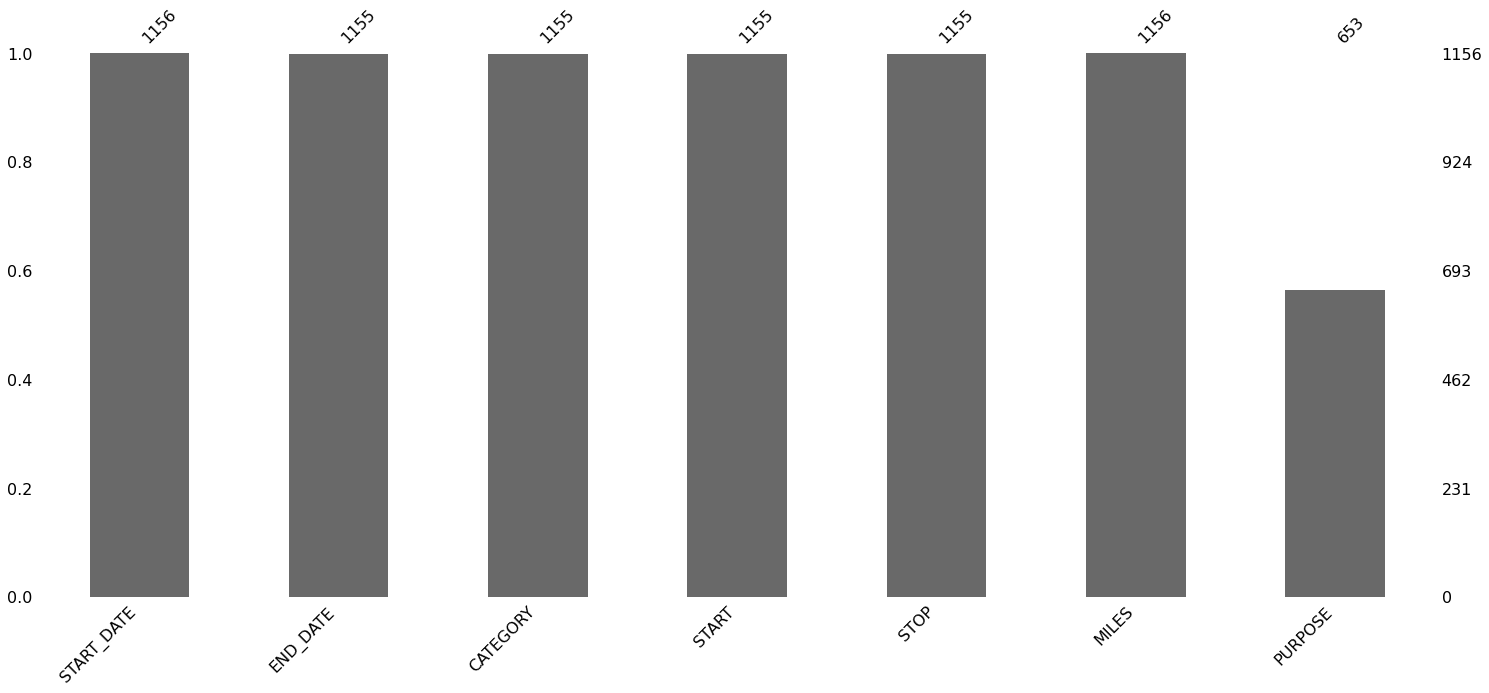

In [ ]:
import missingno as msno          # missingno is a library to visualize the missing values
msno.bar(data)
# We see here it is showing only values except NaN values...

In [ ]:
data.drop(index=1155,axis=0,inplace=True)   # WE can also do like this we find the row of errors so droppping entire row

In [ ]:
data.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [ ]:
data['PURPOSE'].value_counts()   # value_counts()- is for how many times a particular purpose is there

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64

In [ ]:
(data['PURPOSE'].isnull().sum()/len(data))*100      # We are checking the percentage of errors in purpose column

43.46320346320346

In [ ]:
# If we use mode 43% means almost more than 700 values in purpose column will be meeting so we preffered to go with ffill
data['PURPOSE'].fillna(method='ffill',inplace=True)

In [ ]:
data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [ ]:
data['START_DATE']=pd.to_datetime(data['START_DATE'],errors='coerce')
data['END_DATE']=pd.to_datetime(data['END_DATE'],errors='coerce')     #coerce - while tranforming if it throws an error, just simply ignore by placing NA and continue. does not stops execution

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [ ]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


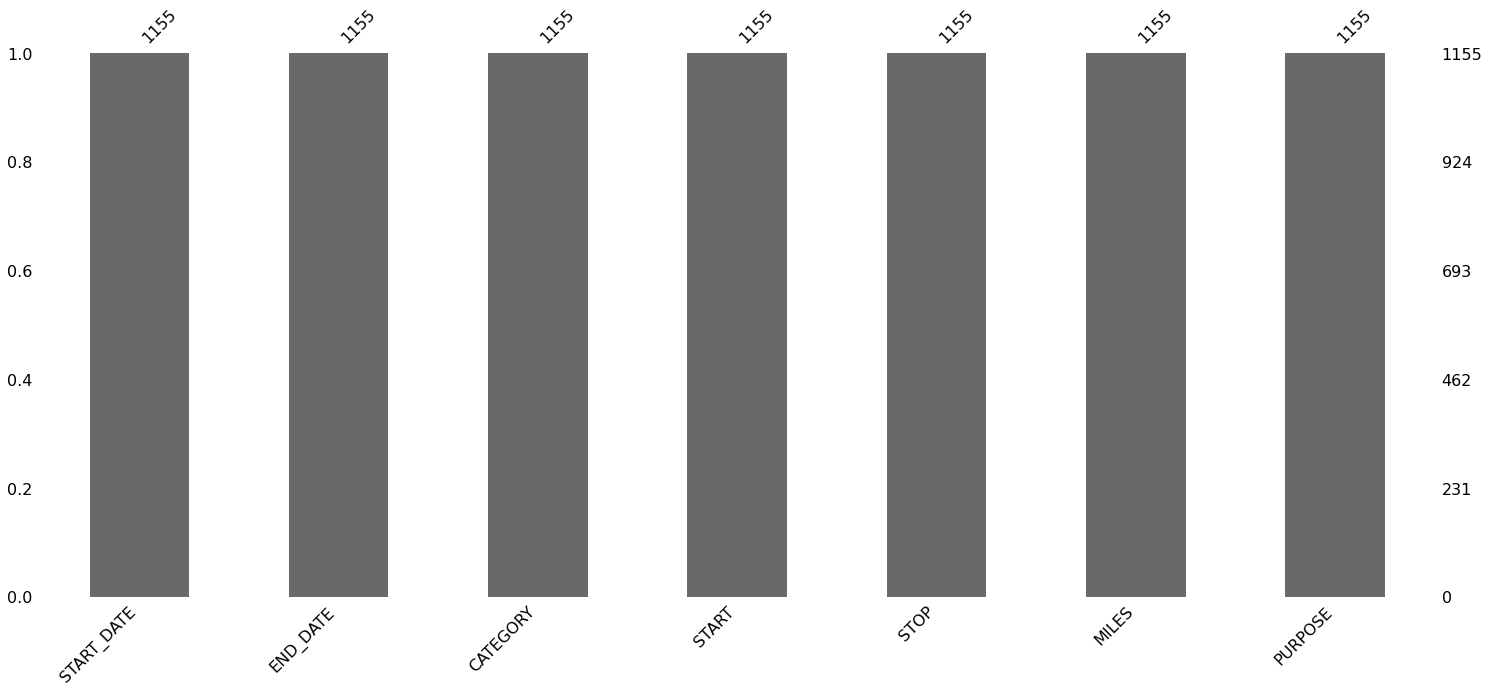

In [ ]:
msno.bar(data)

In [ ]:
category=pd.crosstab(index=data['CATEGORY'],columns='count of travel as per category')
category                      # crosstab is similar to value_counts() but here it looks clean and clear

col_0,count of travel as per category
CATEGORY,
Business,1078
Personal,77


In [ ]:
data['CATEGORY'].value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

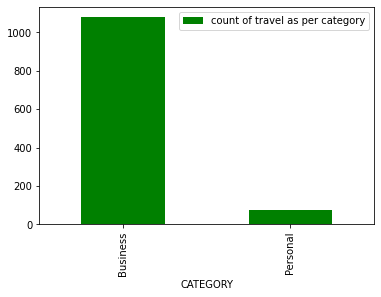

In [ ]:
category.plot(kind='bar',color='g')
plt.legend()    # legend() - for which color for which feature

**<h1 align="center">Start points Analysis**

In [ ]:
start_points=data.START.value_counts()
start_points

Cary                  201
Unknown Location      148
Morrisville            85
Whitebridge            68
Islamabad              57
                     ... 
Tribeca                 1
Chalmette               1
Financial District      1
Jackson Heights         1
Lower Manhattan         1
Name: START, Length: 177, dtype: int64

In [ ]:
start_points[data.START.value_counts()>10]   # checking the start points that are more than 10 times as start point

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
R?walpindi           11
Kenner               11
Kissimmee            11
Name: START, dtype: int64

In [ ]:
start_points[start_points>10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
R?walpindi           11
Kenner               11
Kissimmee            11
Name: START, dtype: int64

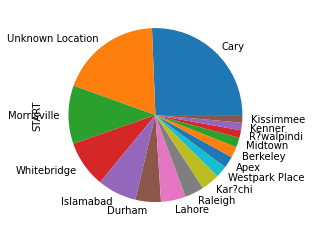

In [ ]:
# plotting start_points that are more than 10 times as start point
start_points[start_points>10].plot(kind='pie')

**<h1 align="center">STOP points Analysis**

In [ ]:
stop_points=data.STOP.value_counts()
stop_points

Cary                     203
Unknown Location         149
Morrisville               84
Whitebridge               65
Islamabad                 58
                        ... 
Queens County              1
Northwest Rectangle        1
Lower Garden District      1
Red River District         1
Lower Manhattan            1
Name: STOP, Length: 188, dtype: int64

In [ ]:
stop_points[stop_points>10]

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: STOP, dtype: int64

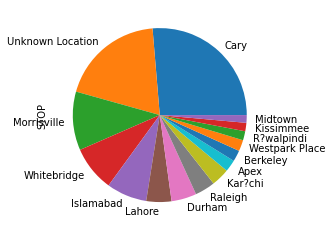

In [ ]:
stop_points[stop_points>10].plot(kind='pie')

**<h1 align="center">Miles Analysis**

In [ ]:
miles=data.MILES.value_counts()
miles

9.9      28
3.1      26
2.1      19
10.4     19
2.5      19
         ..
310.3     1
11.1      1
10.7      1
195.6     1
22.7      1
Name: MILES, Length: 256, dtype: int64

In [ ]:
miles[miles>10]

9.9     28
3.1     26
2.1     19
10.4    19
2.5     19
3.0     19
1.8     18
2.2     18
1.7     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
1.4     14
5.5     14
1.6     13
7.9     13
1.5     12
2.7     12
6.2     12
5.7     12
2.9     12
2.3     12
6.0     11
7.7     11
1.0     11
4.9     11
5.1     11
Name: MILES, dtype: int64

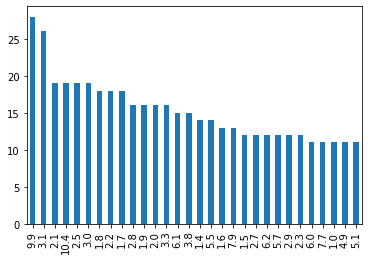

In [ ]:
miles[miles>10].plot(kind='bar')

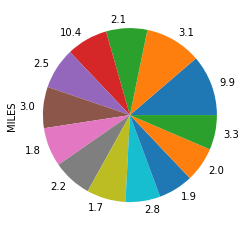

In [ ]:
miles[miles>15].plot(kind='pie')        # More than 15 times

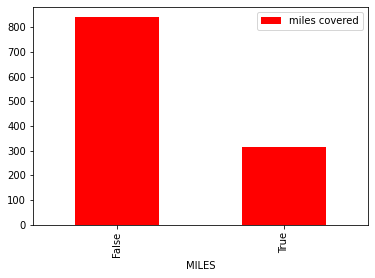

In [ ]:
miles=pd.crosstab(index=data['MILES']>10,columns='miles covered') # using crosstab
miles.plot(kind='bar',color='r')
plt.legend()

In [ ]:
data.PURPOSE.value_counts()

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64

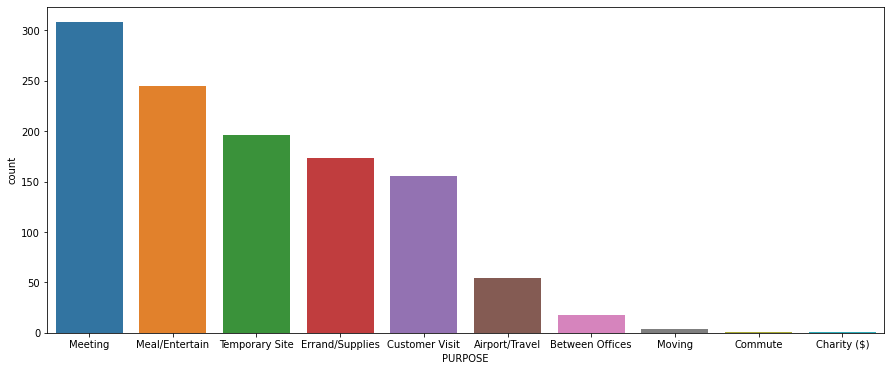

In [ ]:
plt.figure(figsize=(15,6))
sb.countplot(data['PURPOSE'],order=data['PURPOSE'].value_counts().index)

In [ ]:
data['minute']=data['END_DATE'] - data['START_DATE']

In [ ]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minute
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [ ]:
data['minute']=data['minute'].dt.total_seconds()/60

In [ ]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minute
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


**Grouping purpose by miles to see if we get any pattern**

In [ ]:

pd.DataFrame({'MEAN': data.groupby(['PURPOSE'])['MILES'].mean(),
              'MIN': data.groupby(['PURPOSE'])['MILES'].min(),
              'MAX': data.groupby(['PURPOSE'])['MILES'].max()})

,MEAN,MIN,MAX
PURPOSE,,,
Airport/Travel,14.953704,0.9,156.9
Between Offices,10.944444,1.9,39.2
Charity ($),15.100000,15.1,15.1
Commute,180.200000,180.2,180.2
Customer Visit,16.065806,0.6,310.3
Errand/Supplies,5.928902,0.5,195.3
Meal/Entertain,5.773878,0.6,36.5
Meeting,12.652597,0.7,201.0
Moving,4.550000,3.3,6.1


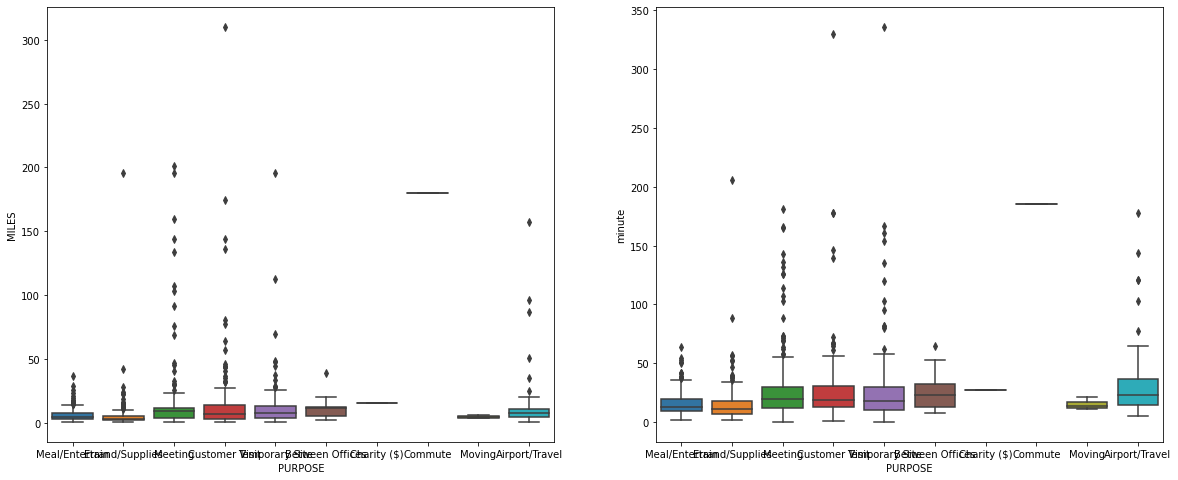

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sb.boxplot(data=data,x=data.PURPOSE,y=data.MILES)
plt.subplot(1,2,2)
sb.boxplot(data=data,x=data.PURPOSE,y=data.minute)

 Checking how many trips are round trips .i.e the start location and stop location is same. <br>
 write a function that will take df as input and in that dfcheck if start == stop return yes otherwise retuen no

In [ ]:

def round(a):
  if a['START'] == a['STOP']:
    return 'yes'
  else:
    return 'no'


data['ROUND_TRIP']=data.apply(round,axis=1)

In [ ]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minute,ROUND_TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no


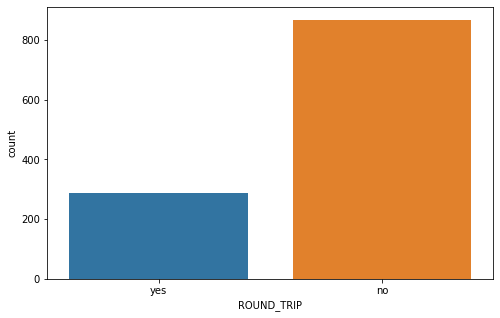

In [ ]:
plt.figure(figsize=(8,5))
sb.countplot(data['ROUND_TRIP'])

** Entering month name and evaluating frequency of trip in each month**

In [ ]:

data['MONTH']=pd.DatetimeIndex(data['START_DATE']).month

In [ ]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minute,ROUND_TRIP,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,1


In [ ]:
dic={1:'Jan',2:'Feb',3:'mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
data['MONTH']=data['MONTH'].map(dic)

In [ ]:
data.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minute,ROUND_TRIP,MONTH
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes,Dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,Dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,Dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,Dec
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,103.0,no,Dec


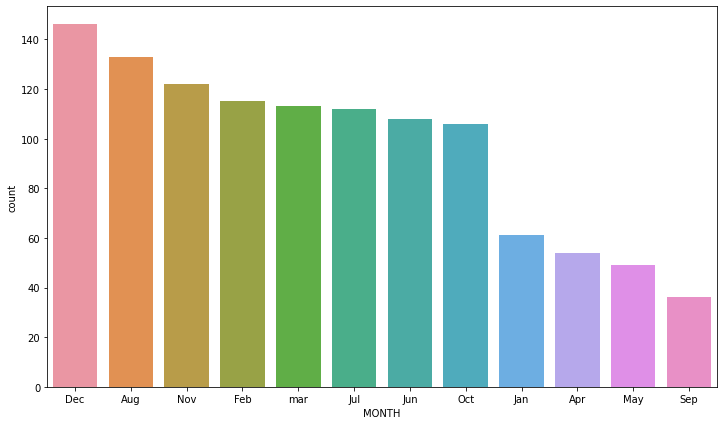

In [ ]:
plt.figure(figsize=(12,7))
sb.countplot(data['MONTH'],order=data['MONTH'].value_counts().index)

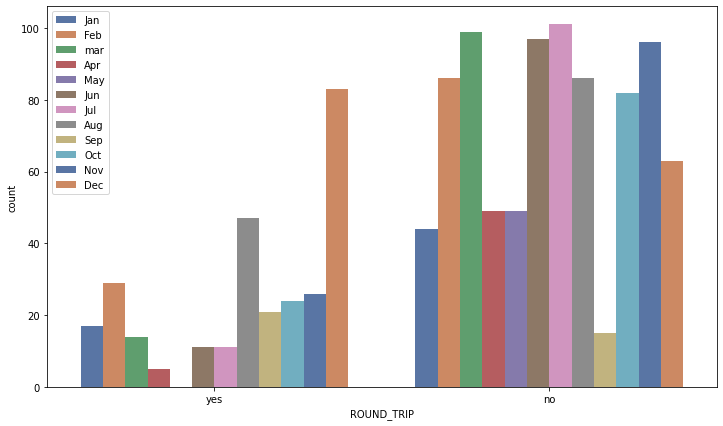

In [ ]:
plt.figure(figsize=(12,7))
sb.countplot(x=data['ROUND_TRIP'],hue=data['MONTH'],palette='deep')
plt.legend()

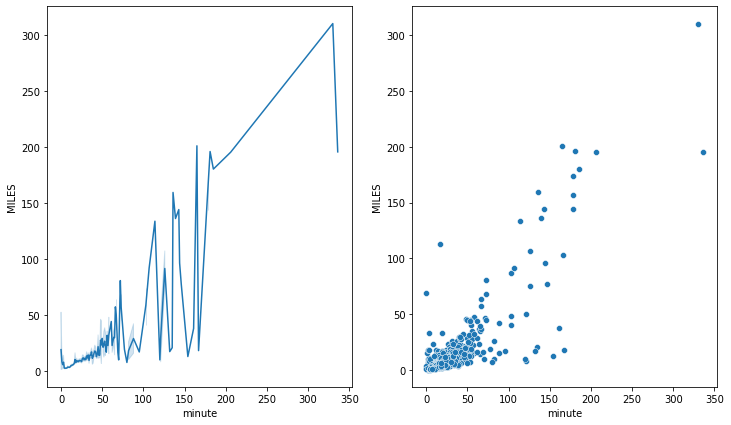

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sb.lineplot(data=data,x=data['minute'],y=data.MILES)
plt.subplot(1,2,2)
sb.scatterplot(data=data,x=data['minute'],y=data.MILES)

* <h1 align="center">Distribution of cab rides based on category</h1> *

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

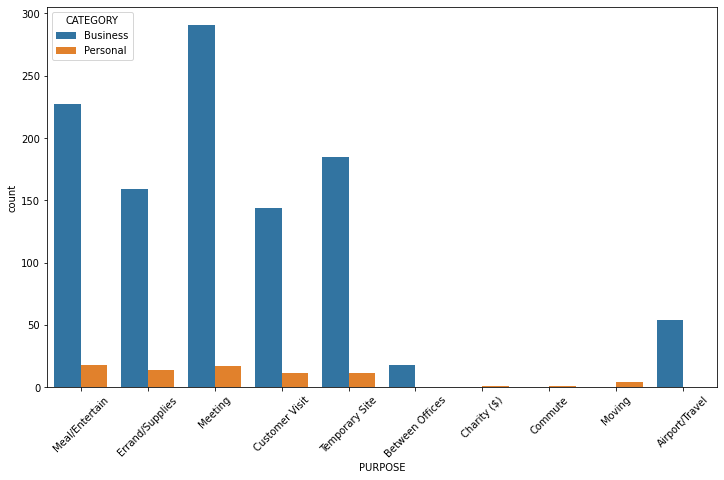

In [ ]:
# Distribution of cab rides based on category
plt.figure(figsize=(12,7))
sb.countplot(data=data,x='PURPOSE',hue='CATEGORY')
plt.xticks(rotation=45)

*<h1>Where do customers most frequently take cabs frequency of cab rides start points</h1>*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

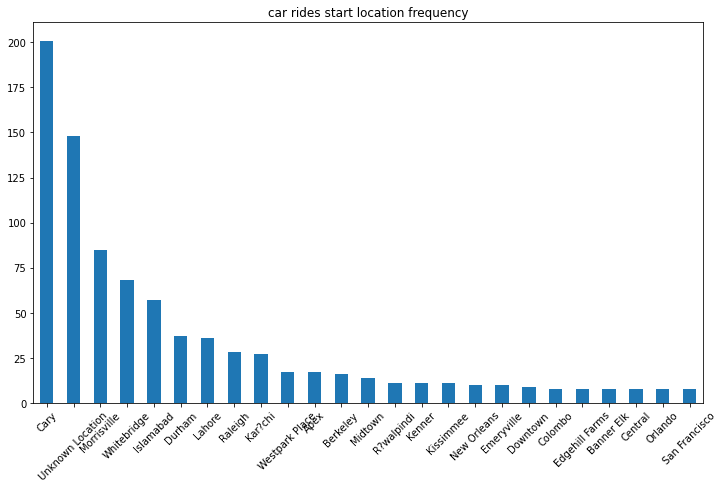

In [ ]:
plt.figure(figsize=(12,7))
pd.Series(data['START']).value_counts()[:25].plot(kind='bar')
plt.title("car rides start location frequency")
plt.xticks(rotation=45)

**<h1 align="center">Frequency of cab rides stop locations**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

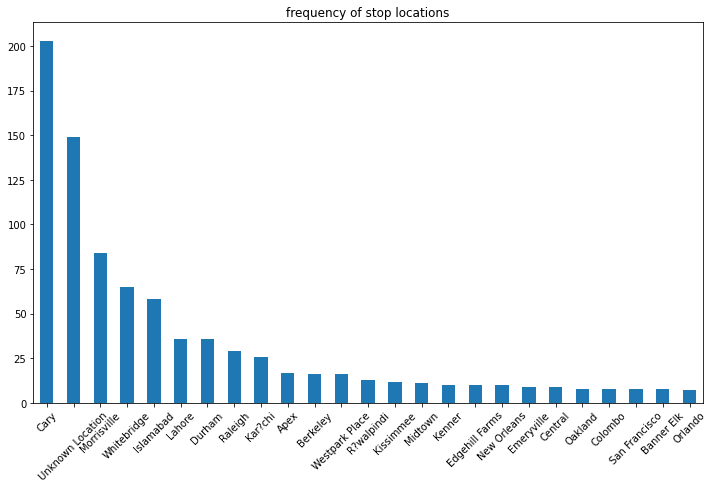

In [ ]:
plt.figure(figsize=(12,7))
pd.Series(data['STOP']).value_counts()[:25].plot(kind='bar')
plt.title("frequency of stop locations")
plt.xticks(rotation=45)

**<h1 align="center">Conclusions</h1>**

- >  Cary is the most frequent cab start and stop location. 
- >  More round trips were there in Dec and Aug.
- >  Most trips were business trips.
- >  Cab bookings were more in month of December and August. So these months can be targeted for best profit making by rising fares.
- >  Cab bookings were least in Sept.
- >  All cabs booked for purpose of airport belongs to business category.
- >  Seasonal pattern is there.
- >  Comapritively less round trips are there.
- >  In July most cabs were books for one way.
- >  In Sept more offers can be introduced to increase cab bookings.
- >  Most of the trips were less than 40 miles and usually take 50-60 min maximum.
- >  Most trips were there for meeting purposes.
